# Housing Prices

## Importing The Required Libraries

In [130]:
import pandas as pd
pd.options.display.max_rows = 100
import numpy as np

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [132]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score

In [133]:
from warnings import filterwarnings
filterwarnings("ignore")

## The Dataset

### Reading The Dataset

In [134]:
data = pd.read_csv("train.csv")

### Getting A Look At The Dataset

In [135]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Checking The Shape Of The Dataset

In [136]:
data.shape

(1460, 81)

We can see that the dataset has 1460 rows and 81 columns

### Checking The Data Types

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Checking For Missing Values

In [138]:
missing_values_pct = data.isnull().sum()/data.shape[0]*100
missing_values_pct[missing_values_pct>0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

## Data Wrangling

### Dealing With The Missing Values

#### Dropping Columns With More Than 20% Missing Values

In [139]:
drop_cols = missing_values_pct[missing_values_pct>20].index.tolist()

In [140]:
data.drop(drop_cols, axis=1, inplace=True)

#### For Columns With Less Missing Values We Will Drop The Rows Containing The Missing Values

In [141]:
drop_cols = missing_values_pct[missing_values_pct<3].index.tolist()

In [142]:
for col in drop_cols:
    data = data.loc[~(data[col].isnull())]

#### Filling Missing Values in LotFrontage Column With The Median Value

In [143]:
data["LotFrontage"].fillna(value=data["LotFrontage"].median(), inplace=True)

#### Filling Missing Values in Categorical Columns With The Mode

In [144]:
cat_cols = ["GarageCond", "GarageQual", "GarageFinish", "GarageYrBlt", "GarageType"]

In [145]:
for col in cat_cols:
    data[col].fillna(value=data[col].mode()[0], inplace=True)

### Checking For The Missing Values Again

In [146]:
missing_values_pct = data.isnull().sum()/data.shape[0]*100
missing_values_pct[missing_values_pct>0].sort_values(ascending=False)

Series([], dtype: float64)

We can see that now there are no missing values

### Checking The Shape Of The Cleaned Dataset

In [147]:
data.shape

(1412, 76)

We can see that we have retained 1412 out of the 1460 rows and 76 out of the 81 columns after data cleaning which is good

## Exploratory Data Analysis

In [148]:
# Check which all columns need to be analyzed

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1412 non-null   int64  
 1   MSSubClass     1412 non-null   int64  
 2   MSZoning       1412 non-null   object 
 3   LotFrontage    1412 non-null   float64
 4   LotArea        1412 non-null   int64  
 5   Street         1412 non-null   object 
 6   LotShape       1412 non-null   object 
 7   LandContour    1412 non-null   object 
 8   Utilities      1412 non-null   object 
 9   LotConfig      1412 non-null   object 
 10  LandSlope      1412 non-null   object 
 11  Neighborhood   1412 non-null   object 
 12  Condition1     1412 non-null   object 
 13  Condition2     1412 non-null   object 
 14  BldgType       1412 non-null   object 
 15  HouseStyle     1412 non-null   object 
 16  OverallQual    1412 non-null   int64  
 17  OverallCond    1412 non-null   int64  
 18  YearBuil

In [149]:
# We see that some categorical variables have a numeric data type. So we will convert it to object data type

cat_cols = ["MSSubClass", "MoSold"]
for col in cat_cols:
    data[col] = data[col].astype("object")

In [150]:
# Splitting The Dataset

target = data["SalePrice"]
X = data.drop(["Id", "SalePrice"], axis=1)

In [151]:
# Splitting the columns of the dataset into numerical and categorical columns

num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(include=object).columns.tolist()

### Visualizing The Numerical Variables Vs SalePrice

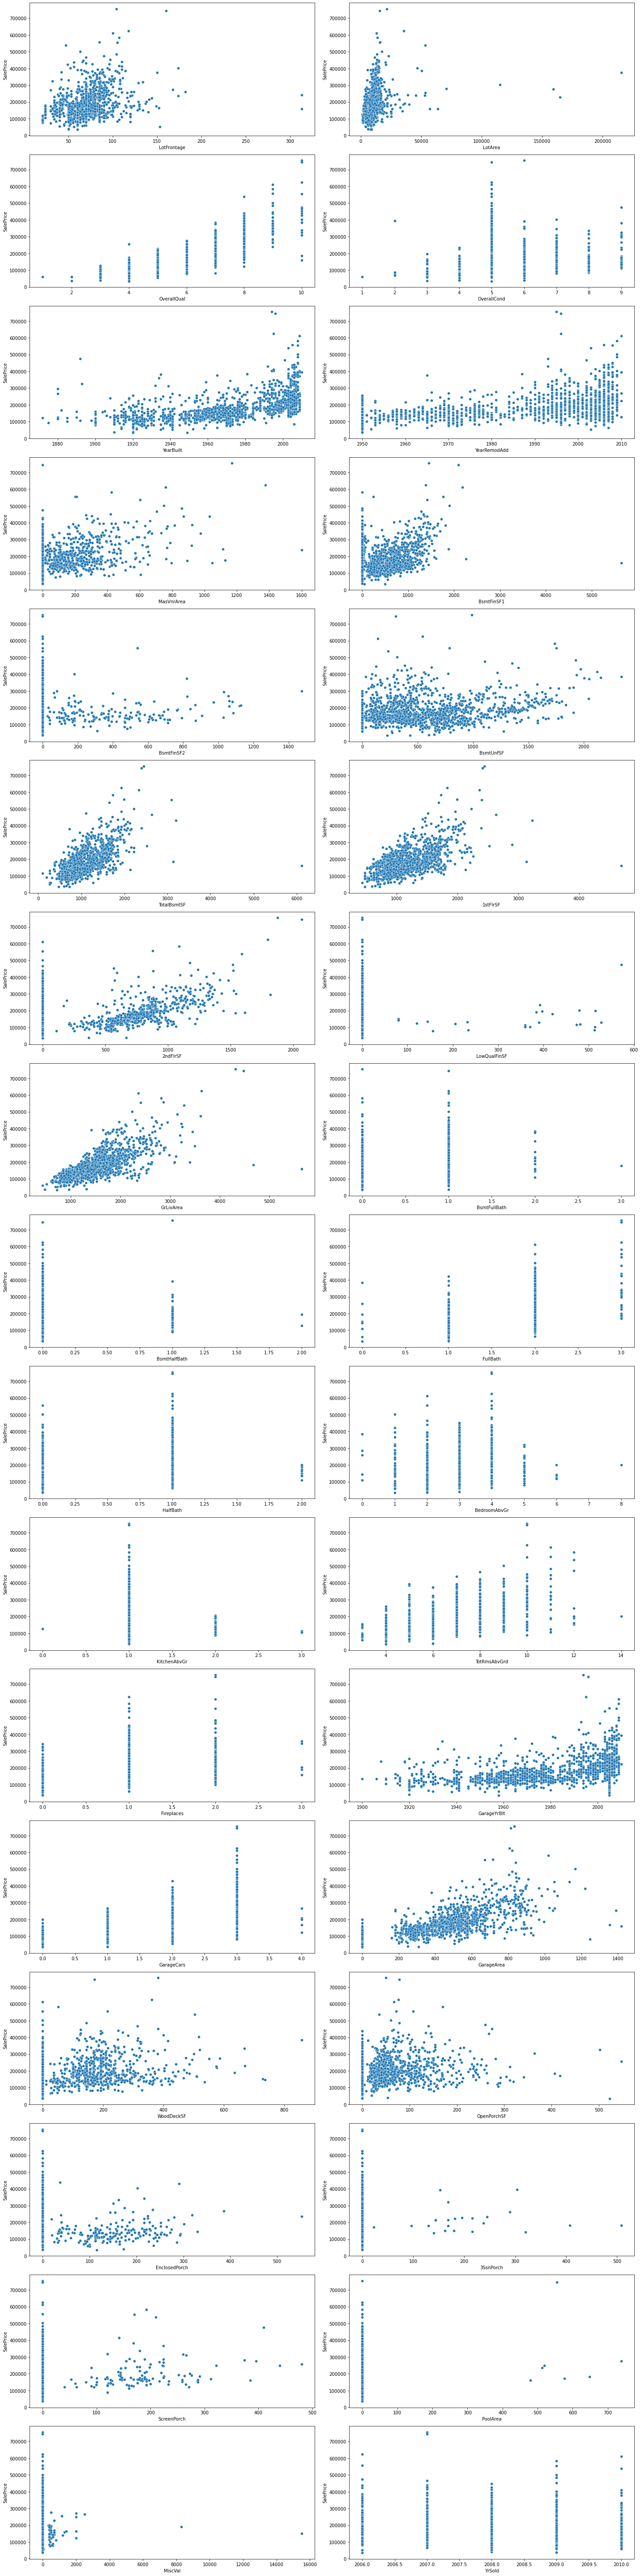

In [152]:
fig, ax = plt.subplots(nrows=17, ncols=2, figsize=(20,80))
for i,d in enumerate(num_cols):
    (x,y) = divmod(i,2)
    sns.scatterplot(x=X[d], y=target, ax=ax[x,y])
plt.tight_layout()
plt.show()

### Categorical Variables

#### Exploring the categorical variables

We will explore all the categorical variables and check the percentage of each category. If the percentage of any category is greater than or equal to 90 we will drop that variable.

In [153]:
imb_cat_cols = []

for col in cat_cols:
    print(col)
    value_counts_pct = round(X[col].value_counts(normalize=True)*100,2)
    print(value_counts_pct)
    if(value_counts_pct.iloc[0]>=90):
        imb_cat_cols.append(col)
    print()

MSSubClass
20     36.47
60     20.82
50      9.99
120     6.09
30      4.89
160     4.46
70      4.25
80      4.04
90      2.69
190     1.98
85      1.35
75      1.13
45      0.85
180     0.71
40      0.28
Name: MSSubClass, dtype: float64

MSZoning
RL         78.68
RM         15.16
FV          4.39
RH          1.06
C (all)     0.71
Name: MSZoning, dtype: float64

Street
Pave    99.58
Grvl     0.42
Name: Street, dtype: float64

LotShape
Reg    62.75
IR1    33.71
IR2     2.83
IR3     0.71
Name: LotShape, dtype: float64

LandContour
Lvl    89.73
Bnk     4.32
HLS     3.54
Low     2.41
Name: LandContour, dtype: float64

Utilities
AllPub    99.93
NoSeWa     0.07
Name: Utilities, dtype: float64

LotConfig
Inside     71.88
Corner     18.13
CulDSac     6.44
FR2         3.26
FR3         0.28
Name: LotConfig, dtype: float64

LandSlope
Gtl    94.55
Mod     4.53
Sev     0.92
Name: LandSlope, dtype: float64

Neighborhood
NAmes      15.23
CollgCr    10.48
OldTown     7.86
Edwards     6.30
Somerst    

In [154]:
X.drop(imb_cat_cols, axis=1, inplace=True)
cat_cols = [ele for ele in cat_cols if ele not in imb_cat_cols]

We will split the categorical columns into two: 
1. Those having less than or equal to 5 categories. We will use vertical bar plot to visualize them.
2. Those having greater than 5 categories. We will use horizontal bar plot to visualize them.

In [155]:
less_cat = []
more_cat = []

for col in cat_cols:
    if(X[col].nunique()<=5):
        less_cat.append(col)
    else:
        more_cat.append(col)

In [156]:
len(less_cat)

14

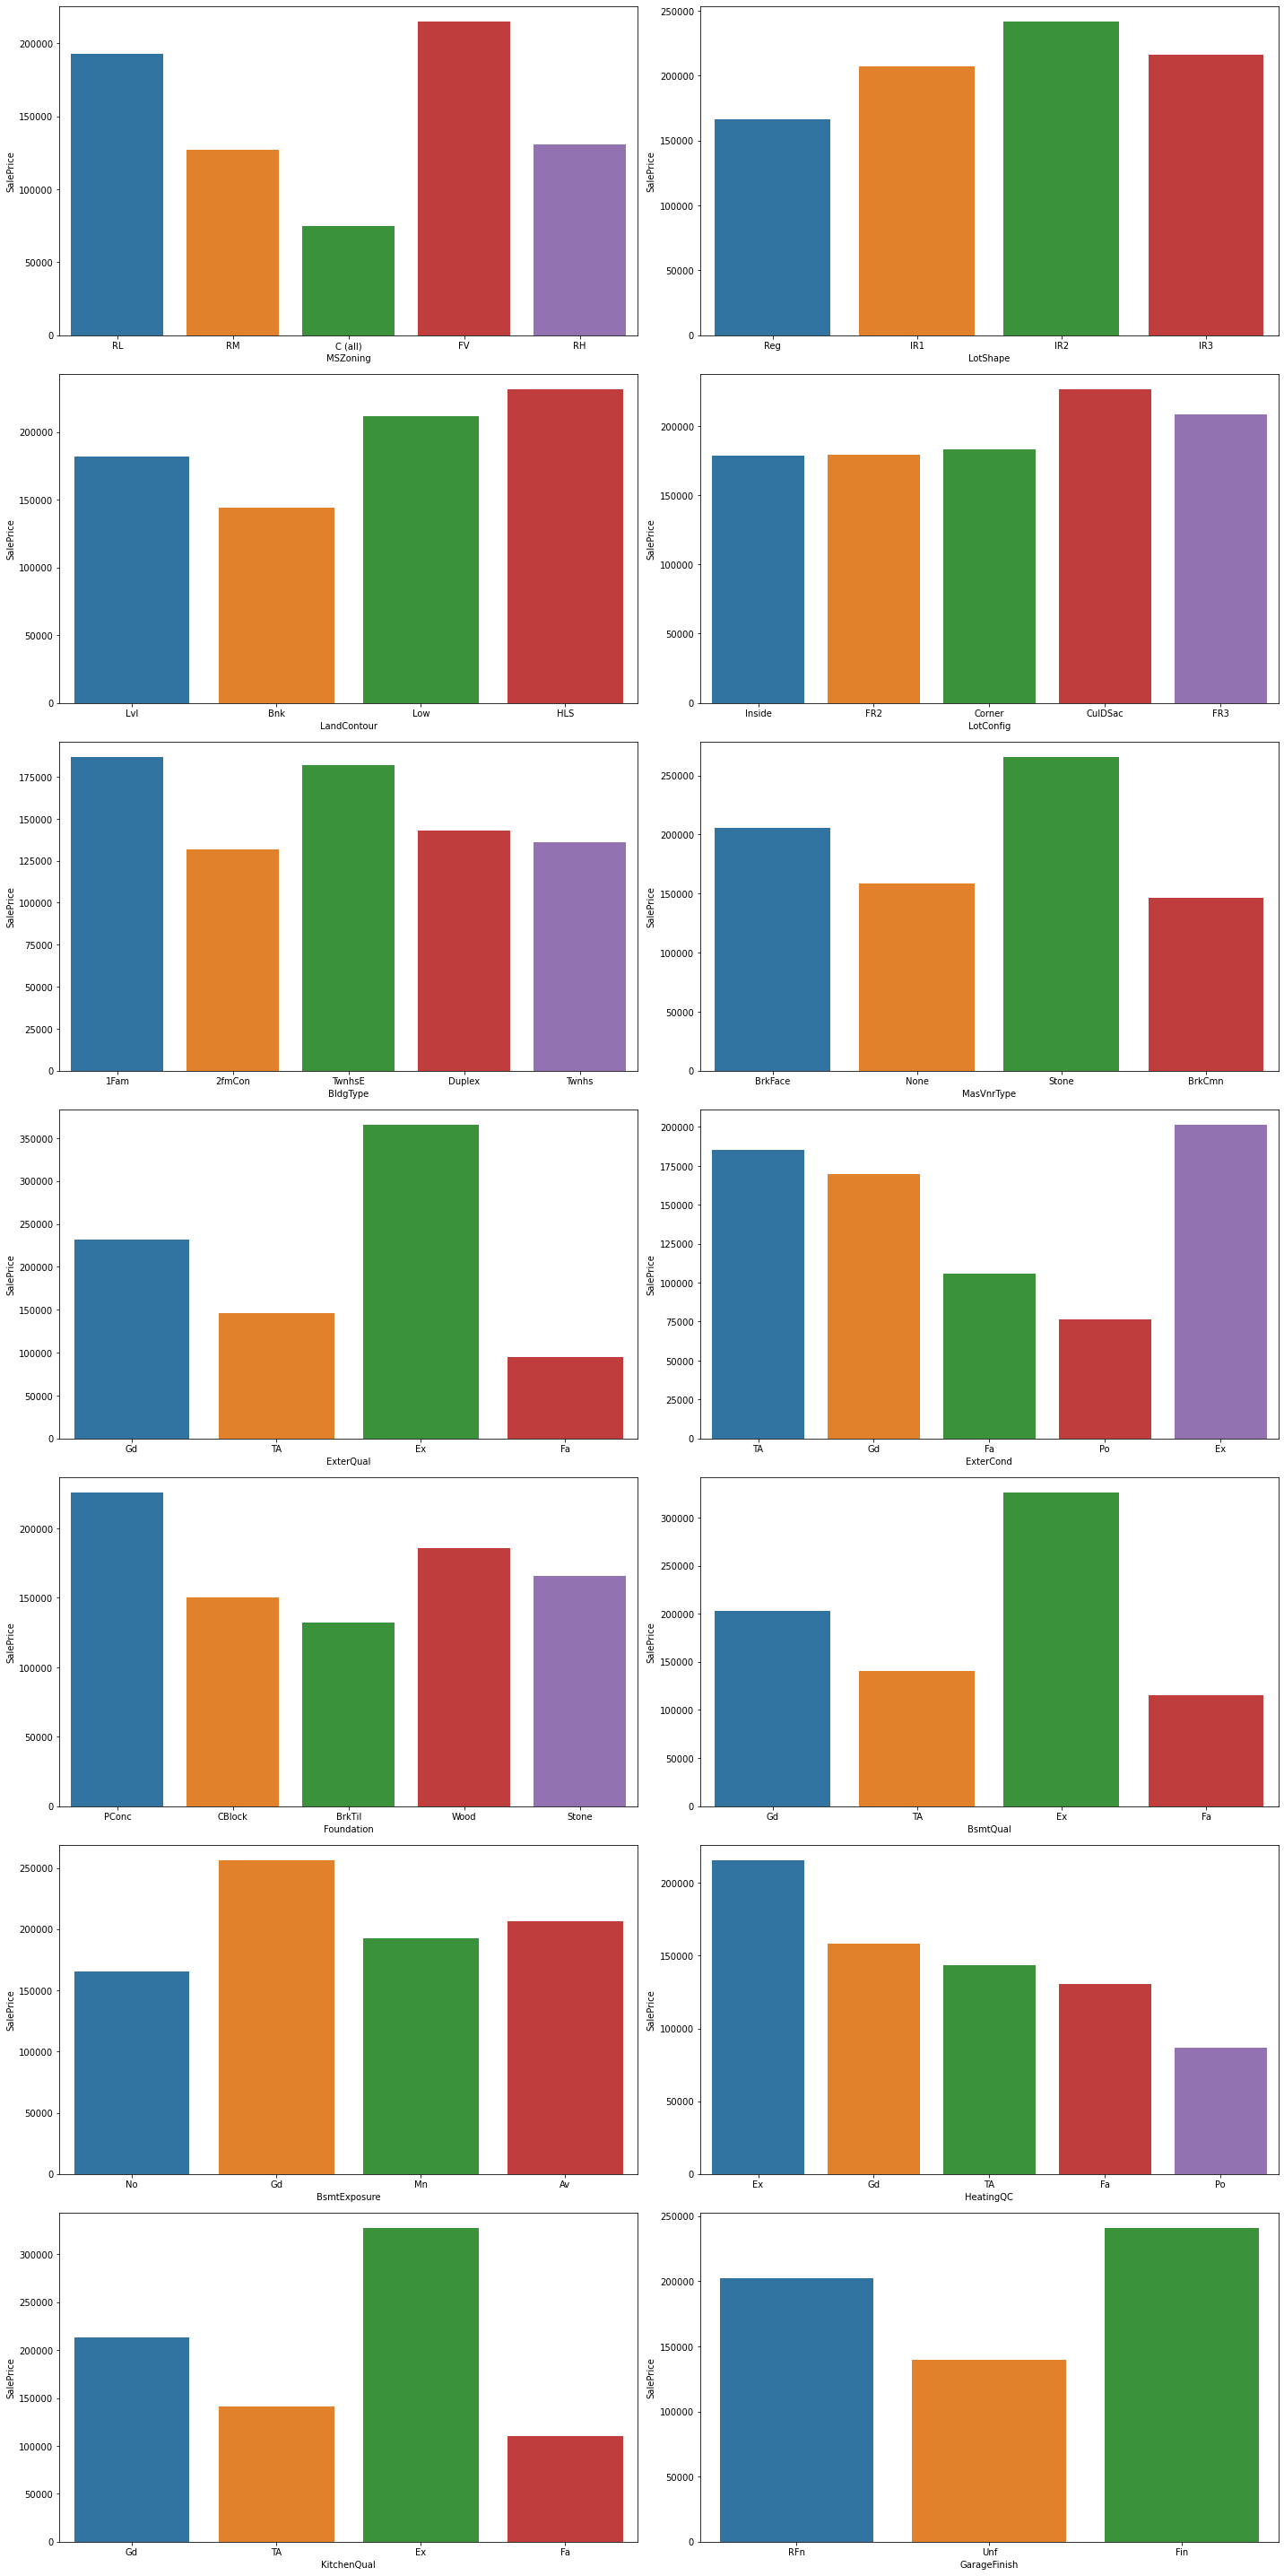

In [157]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(20,40))
for i,d in enumerate(less_cat):
    (x,y) = divmod(i,2)
    sns.barplot(x=X[d], y=target, ci=None, ax=ax[x,y])
plt.tight_layout()
plt.show()

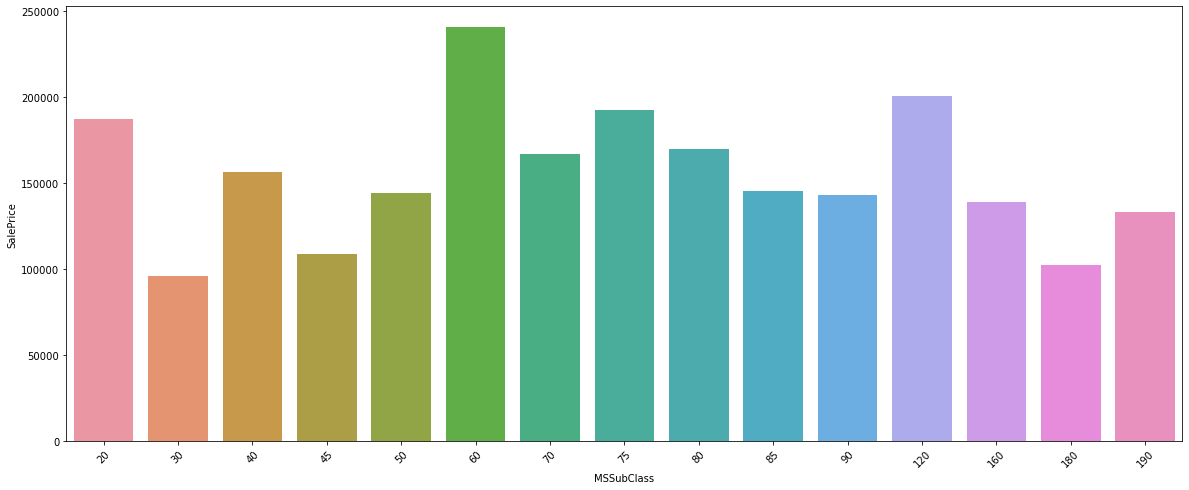

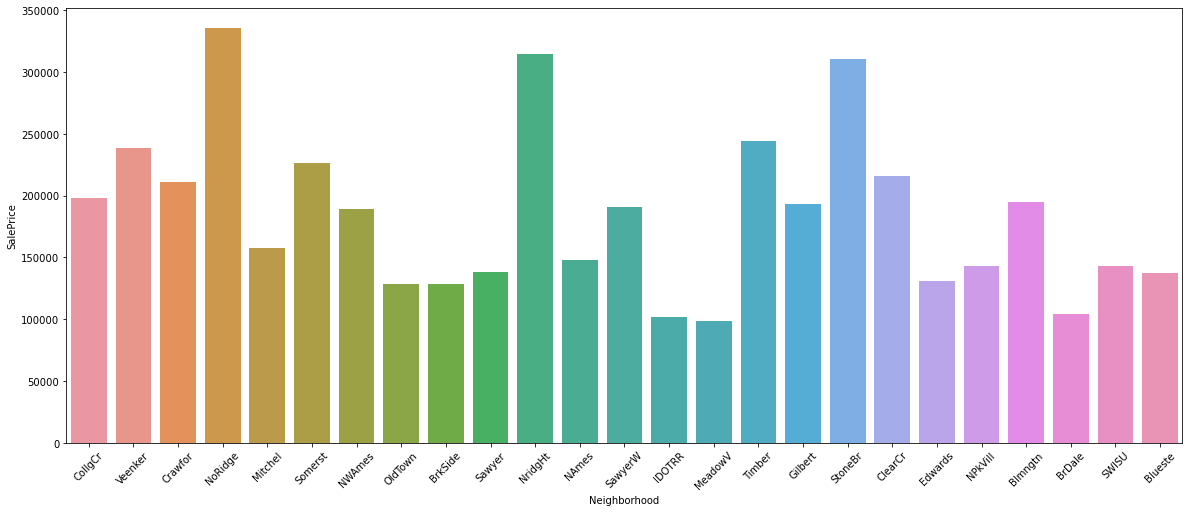

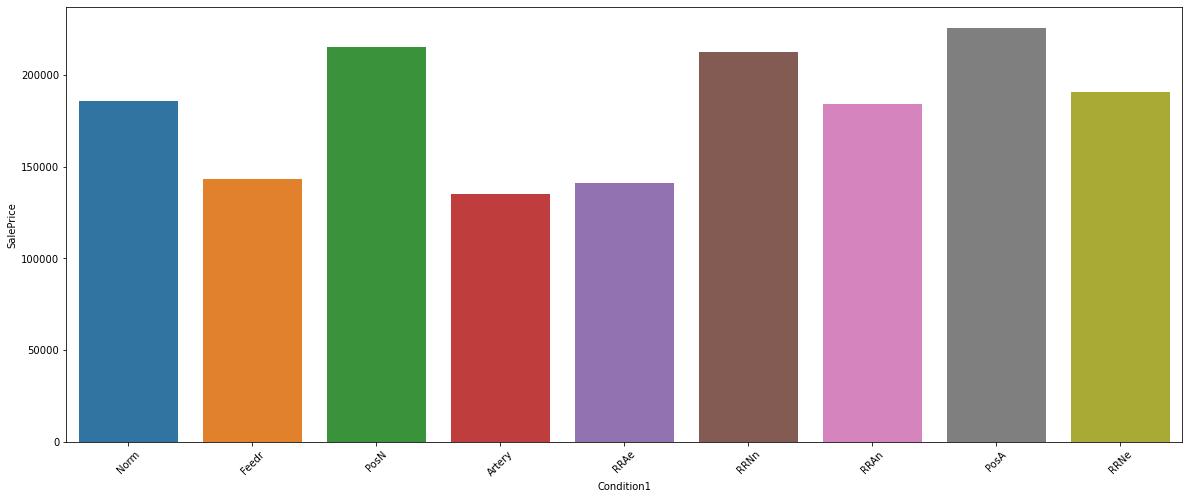

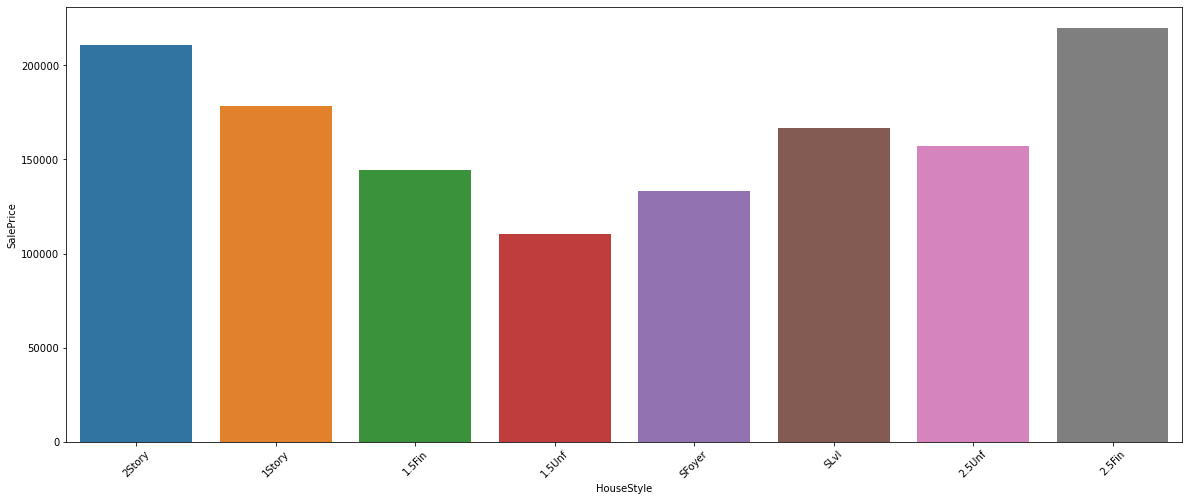

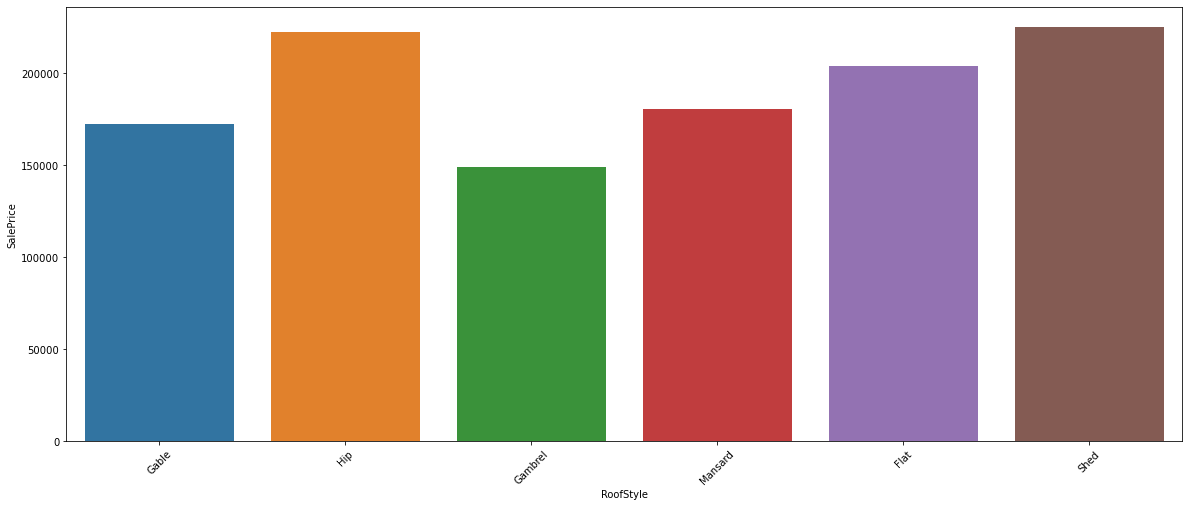

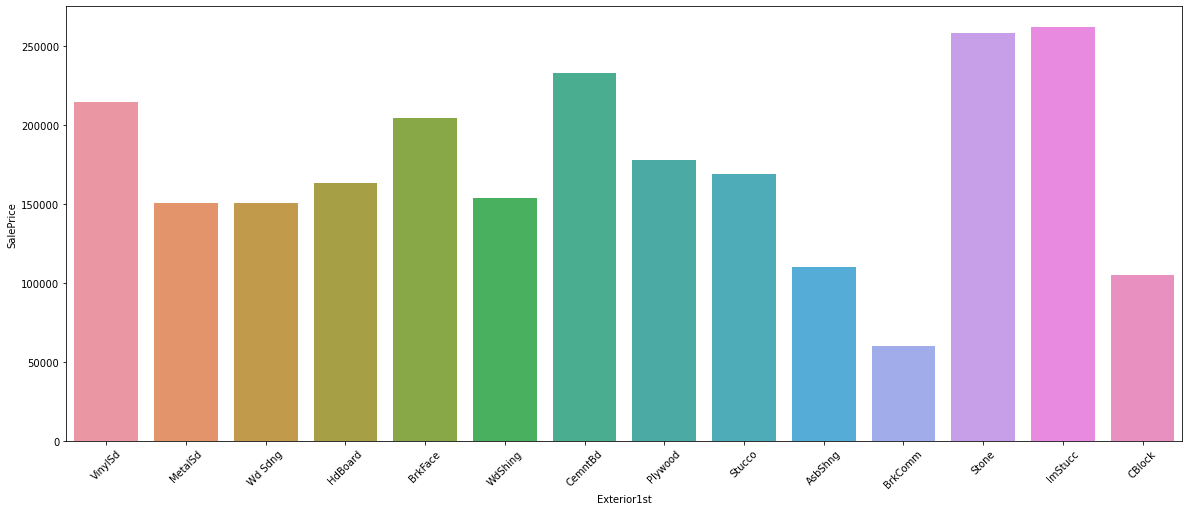

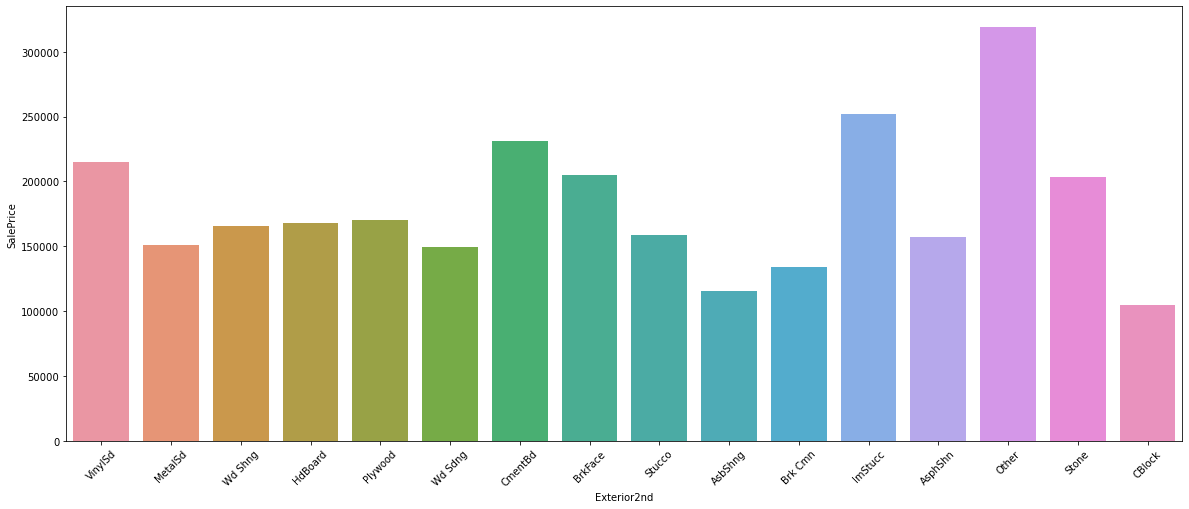

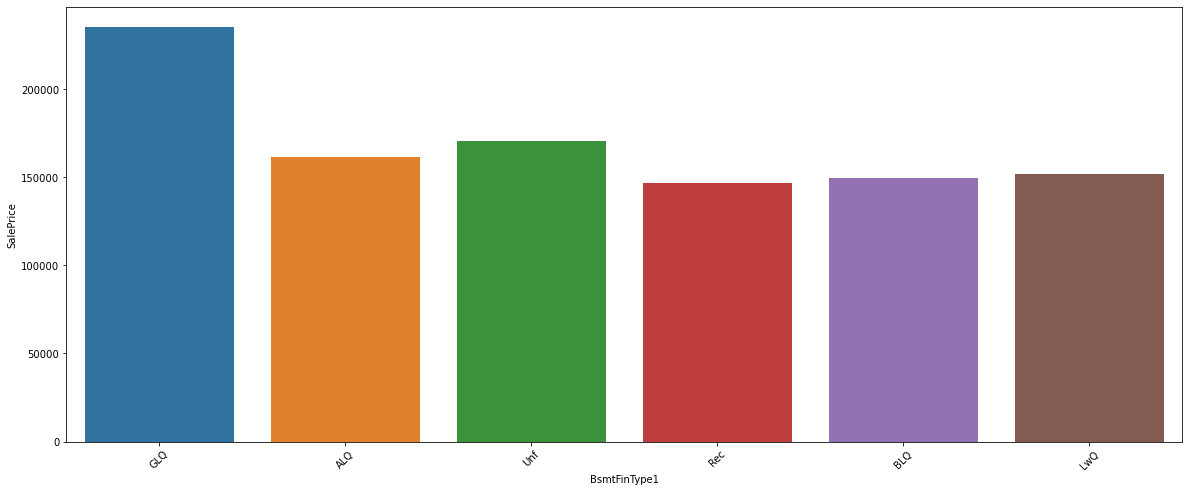

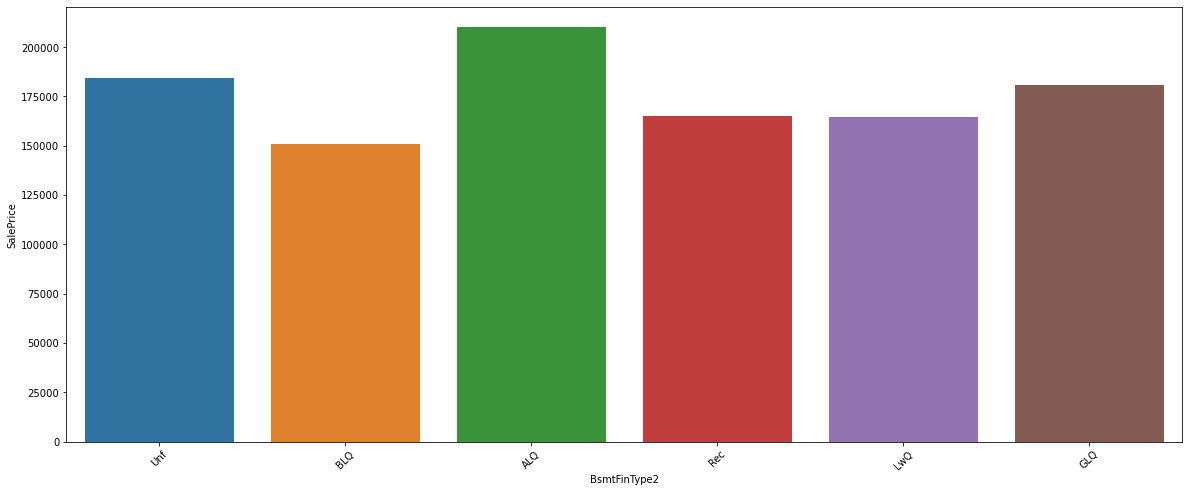

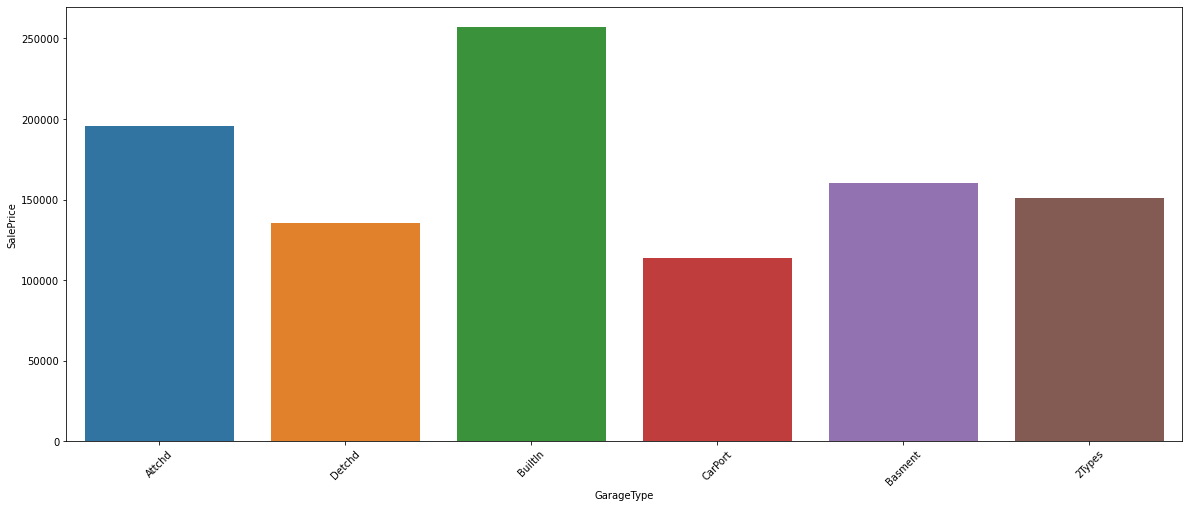

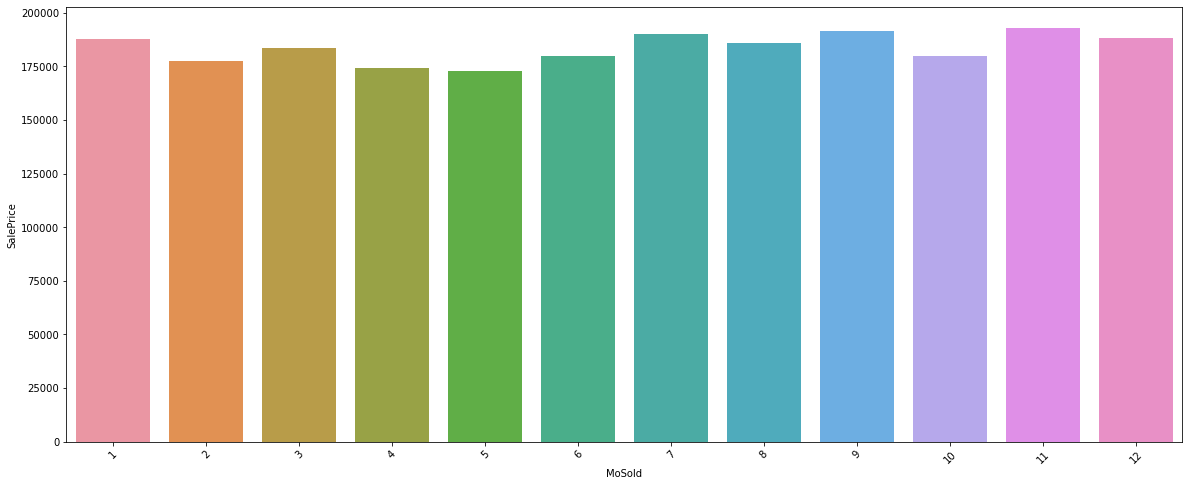

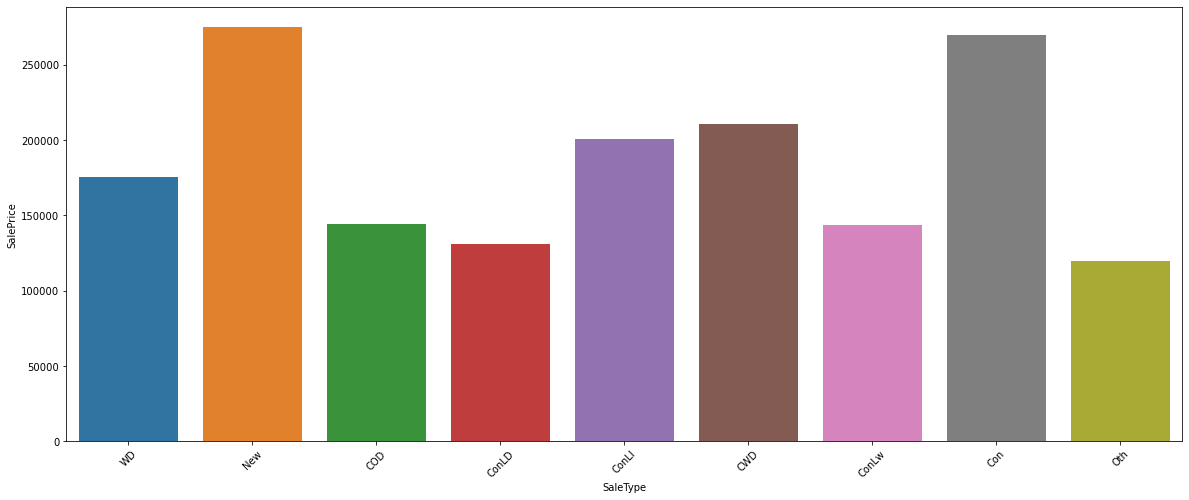

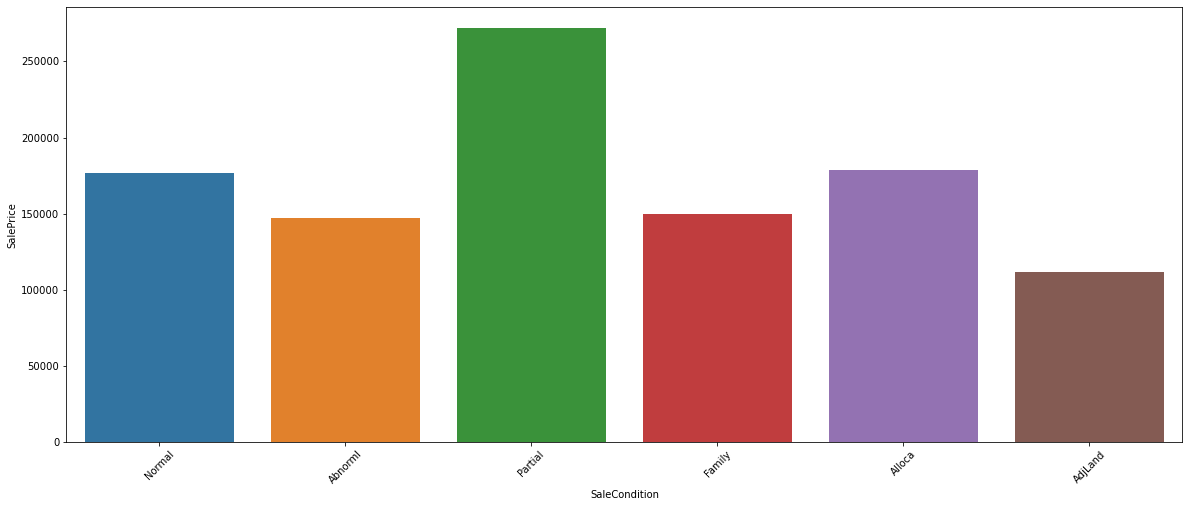

In [158]:
for col in more_cat:
    plt.figure(figsize=(20,8))
    sns.barplot(x=X[col], y=target, ci=None)
    plt.xticks(rotation=45)
    plt.show()

### Visualizing The Target Vatiable

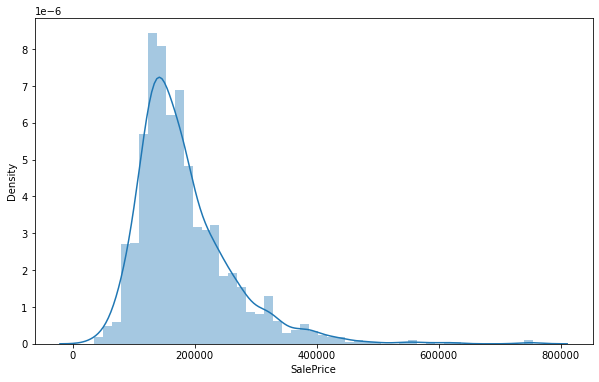

In [159]:
plt.figure(figsize=(10,6))
sns.distplot(target)
plt.show()

We can see that the target variable is not normally distributed. So we have to apply a log transformation to it.

## Data Preparation

### Applying Log Transform On The Target Variable

In [160]:
target = np.log(target)

### Creating A New Column From YearBuilt Variable

In [161]:
X["Age"] = 2021 - X["YearBuilt"]

### Dropping The Useless Variables

In [162]:
drop_cols = ["MoSold", "YearBuilt", "YearRemodAdd", "YrSold", "GarageYrBlt"]

In [163]:
X.drop(drop_cols, axis=1, inplace=True)

### Encoding The Ordinal Variables

In [164]:
X["LotShape"] = X["LotShape"].map({"Reg":0, "IR1":1, "IR2":2, "IR3":3})

In [165]:
X["ExterQual"] = X["ExterQual"].map({"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4})
X["ExterCond"] = X["ExterCond"].map({"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4})
X["HeatingQC"] = X["HeatingQC"].map({"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4})
X["KitchenQual"] = X["KitchenQual"].map({"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4})

In [166]:
X["BsmtQual"] = X["BsmtQual"].map({"NA":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})

In [167]:
X["BsmtExposure"] = X["BsmtExposure"].map({"NA":0, "No":1, "Mn":2, "Av":3, "Gd":4})

In [168]:
X["GarageFinish"] = X["GarageFinish"].map({"NA":0, "Unf":1, "RFn":2, "Fin":3})

In [169]:
X["BsmtFinType1"] = X["BsmtFinType1"].map({"NA":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6})
X["BsmtFinType2"] = X["BsmtFinType2"].map({"NA":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6})

### Creating Dummy Variables For Nominal Variables

In [170]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1412 non-null   object 
 1   MSZoning       1412 non-null   object 
 2   LotFrontage    1412 non-null   float64
 3   LotArea        1412 non-null   int64  
 4   LotShape       1412 non-null   int64  
 5   LandContour    1412 non-null   object 
 6   LotConfig      1412 non-null   object 
 7   Neighborhood   1412 non-null   object 
 8   Condition1     1412 non-null   object 
 9   BldgType       1412 non-null   object 
 10  HouseStyle     1412 non-null   object 
 11  OverallQual    1412 non-null   int64  
 12  OverallCond    1412 non-null   int64  
 13  RoofStyle      1412 non-null   object 
 14  Exterior1st    1412 non-null   object 
 15  Exterior2nd    1412 non-null   object 
 16  MasVnrType     1412 non-null   object 
 17  MasVnrArea     1412 non-null   float64
 18  ExterQua

In [171]:
cat_cols = X.select_dtypes(include=object).columns.tolist()

In [172]:
dummies = pd.get_dummies(X[cat_cols], drop_first=True)

In [173]:
X.drop(cat_cols, axis=1, inplace=True)
X = pd.concat([X, dummies], axis=1)

### Creating The Train Test Split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.25, random_state=100)

### Standardizing The Predictor Variables

In [175]:
cols = X_train.columns.tolist()
ss = StandardScaler()

X_train = pd.DataFrame(ss.fit_transform(X_train), columns=cols)
X_test = pd.DataFrame(ss.transform(X_test), columns=cols)

## Model Building

### Using Recursive Feature Elimination To Trim Down The Number Of Features To 50

In [176]:
rfem = RFE(LinearRegression(),50).fit(X_train,y_train)
sel_cols = X_train.columns[rfem.support_]

In [177]:
# Selecting The Features Based On RFE
X_train = X_train[sel_cols]

### Setting Up A Grid Search

In [178]:
parameters = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

### Lasso Regression

In [179]:
lasso = Lasso()
gscv = GridSearchCV(lasso, parameters)
gscv.fit(X_train, y_train)

#Getting the best parameter
gscv.best_params_

{'alpha': 0.001}

In [180]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [181]:
lasso_pred = (lasso.predict(X_test[sel_cols]))

In [182]:
r2_score(y_test, lasso_pred)

0.7210803020110015

In [183]:
feature_importances = pd.DataFrame({"Feature":sel_cols,"Importance":lasso.coef_})
feature_importances.sort_values(by="Importance", ascending=False).head(10)

,Feature,Importance
12,GrLivArea,0.127242
2,OverallQual,0.076936
26,MSZoning_RL,0.071660
3,OverallCond,0.056769
7,TotalBsmtSF,0.045812
24,MSZoning_FV,0.043570
27,MSZoning_RM,0.043113
47,SaleType_New,0.032334
4,BsmtFinSF1,0.030558
18,GarageCars,0.026442


### Ridge Regression

In [184]:
ridge = Ridge()
gscv = GridSearchCV(ridge, parameters)
gscv.fit(X_train, y_train)

#Getting the best parameter
gscv.best_params_

{'alpha': 10}

In [185]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [186]:
ridge_pred = (ridge.predict(X_test[sel_cols]))

In [187]:
r2_score(y_test, ridge_pred)

0.7189857439626234

In [188]:
feature_importances = pd.DataFrame({"Feature":sel_cols,"Importance":ridge.coef_})
feature_importances.sort_values(by="Importance", ascending=False).head(10)

,Feature,Importance
26,MSZoning_RL,0.093966
12,GrLivArea,0.075772
2,OverallQual,0.072986
27,MSZoning_RM,0.065211
10,2ndFlrSF,0.060923
3,OverallCond,0.056665
47,SaleType_New,0.056091
24,MSZoning_FV,0.054960
7,TotalBsmtSF,0.046831
4,BsmtFinSF1,0.034371


## Conclusion

We have built two models for the dataset - one using Ridge Regression and the another with Lasso Regression.
We see that there is a little bit of difference in the R2 score between the two models.